### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv('vehicle.csv')
df_vehicle=data.dropna()
print("Input Data and Shape")
print(df_vehicle.shape)

df_vehicle.head()





Input Data and Shape
(813, 19)


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

In [2]:
import seaborn as sns
print(df_vehicle['class'].value_counts())
df_vehicle.groupby(['class']).count()
print(sns.countplot(x='class',data=df_vehicle))

car    413
bus    205
van    195
Name: class, dtype: int64
AxesSubplot(0.125,0.11;0.775x0.77)


### Check for any missing values in the data 

In [3]:
print(df_vehicle.isnull().sum())

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64


### 3. Standardize the data 

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [4]:
from scipy.stats import zscore
df_vehicle_new = df_vehicle.drop('class',axis=1)
df_vehicle_new = df_vehicle_new.apply(zscore)
df_vehicle_new.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,-0.397397,-0.339014,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,-0.590034,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318
2,1.256966,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,-1.152637,0.949438,0.697326,1.111591,1.122486,1.415804,0.080339,1.555006,-0.413338,-0.159204,0.036596
3,-0.079822,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,0.642562,-0.606014,-0.337462,-0.911095,-0.738643,-1.462359,-1.258099,-0.071523,-0.301249,1.629444,1.524243
4,-1.052030,-0.130753,-0.763506,1.068668,5.173770,9.285029,-0.591720,0.514333,-0.606014,-0.268476,1.689501,-0.647299,0.425468,7.307905,0.538425,-0.189159,-1.460039,-1.721531


In [5]:
X=df_vehicle_new

### K - Means Clustering

### Assign a dummy array called Cluster_error

In [6]:
#cluster_error[]

### 5. Calculate errorrs for each K

Iterating values of k from 1 to 10 fit K means model
Using inertia

In [7]:
from sklearn.cluster import KMeans
cluster_range = range( 1, 11)  
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(X)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:15]


,num_clusters,cluster_errors
0,1,14634.000000
1,2,8623.136976
2,3,7037.467395
3,4,6422.271783
4,5,5209.183854
5,6,4707.860902
6,7,4355.139334
7,8,4089.894296
8,9,3845.961911
9,10,3652.131580


In [8]:
print(clusters.inertia_)

3652.1315799120953


### 6. Plotting Elbow/ Scree Plot

Use Matplotlib to plot the scree plot - Note: Scree plot plots Errors vs the no of clusters

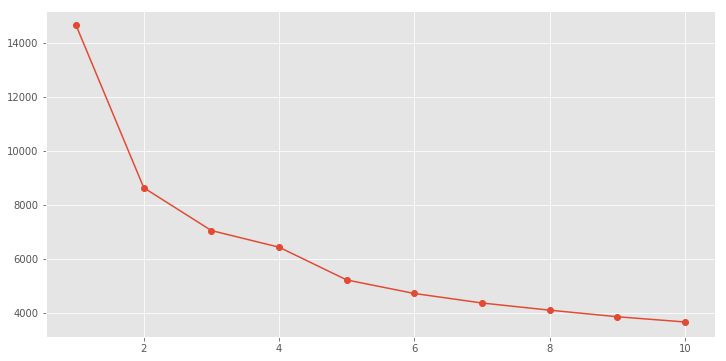

In [9]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import metrics
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

### Find out the optimal value of K

In [10]:
# Optimal value of K visually from the Elbow plot is 4
from matplotlib import pyplot as plt
import seaborn as sns
#sns.pairplot(df_vehicle,diag_kind='kde',hue='class')
print("Optimal value of K from Elbow plot is 4")

Optimal value of K from Elbow plot is 4


### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [11]:
kmeans = KMeans(n_clusters=4)

# Fitting the input data

kmeans = kmeans.fit(X)

# Getting the cluster labels

labels = kmeans.predict(X)

# Centroid values

centroids = kmeans.cluster_centers_

# Comparing with scikit-learn centroids

print("Centroid values")
print("sklearn")

print(centroids) # From sci-kit learn

Centroid values
sklearn
[[-8.93707504e-01 -4.85518520e-01 -8.51656762e-01 -1.04902870e+00
  -5.22253048e-01 -2.79014211e-01 -7.60545198e-01  8.39247071e-01
  -7.28404929e-01 -4.41353225e-01 -7.82031265e-01 -7.67733496e-01
  -3.62041035e-01  7.50091502e-01 -8.69137423e-02 -2.97676019e-01
  -1.02405239e+00 -1.06095378e+00]
 [ 1.15442786e+00  1.18428647e+00  1.21198691e+00  9.73321772e-01
   9.49213388e-02  2.18659142e-01  1.29796844e+00 -1.21424667e+00
   1.30184458e+00  1.09830595e+00  1.20590258e+00  1.30898668e+00
   1.09121291e+00 -1.07878646e-01  1.68326262e-01  2.67954844e-01
   4.67043879e-03  1.90327006e-01]
 [-2.19291117e-01 -6.10382776e-01 -3.16528303e-01 -3.16967632e-02
   1.74806836e-01 -1.86301401e-01 -4.60077221e-01  3.23711910e-01
  -4.89876936e-01 -5.79375663e-01 -4.22823604e-01 -4.62063543e-01
  -6.38187291e-01 -6.72419933e-01 -6.40183166e-02  2.67442381e-02
   8.77535138e-01  7.42298292e-01]
 [-7.33024343e-01  7.27349604e-02 -2.72170954e-01  2.94768327e+00
   6.83665190

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [12]:
centroid_df=pd.DataFrame(centroids,columns=list(df_vehicle_new))
print(centroid_df)

   compactness  circularity  distance_circularity  radius_ratio  \
0    -0.893708    -0.485519             -0.851657     -1.049029   
1     1.154428     1.184286              1.211987      0.973322   
2    -0.219291    -0.610383             -0.316528     -0.031697   
3    -0.733024     0.072735             -0.272171      2.947683   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0             -0.522253                -0.279014      -0.760545   
1              0.094921                 0.218659       1.297968   
2              0.174807                -0.186301      -0.460077   
3              6.836652                 8.696706      -0.535008   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.839247               -0.728405                  -0.441353   
1      -1.214247                1.301845                   1.098306   
2       0.323712               -0.489877                  -0.579376   
3       0.466248               -0.557406    

Hint: Use pd.Dataframe function 

### Use kmeans.labels_ function to print out the labels of the classes

In [13]:
print(kmeans.labels_)


[2 2 1 2 3 2 2 2 2 2 2 2 2 1 0 2 1 0 0 2 2 1 2 0 1 1 0 2 2 2 1 2 0 3 1 0 1
 0 0 2 1 0 0 0 0 2 0 2 1 2 1 2 2 0 1 0 1 0 0 0 2 0 1 2 1 1 2 0 2 1 2 0 0 1
 2 0 2 1 2 0 2 0 1 2 1 0 0 1 0 0 1 0 3 2 2 0 1 1 0 0 1 2 2 0 0 0 2 1 1 2 0
 0 2 0 0 0 0 0 2 1 1 2 2 0 1 3 0 2 0 2 2 1 0 2 1 2 2 2 2 1 2 2 1 2 1 2 0 2
 0 1 2 2 1 1 2 1 0 0 1 1 2 1 0 2 2 2 0 1 0 2 0 1 2 2 2 1 2 1 2 1 2 0 1 0 0
 0 0 2 1 1 2 2 2 0 1 2 2 2 1 0 0 1 0 2 1 0 0 0 2 1 2 1 0 0 0 0 1 2 0 2 1 0
 2 2 0 1 0 0 2 2 1 0 1 0 2 0 1 2 2 1 1 0 2 2 2 1 0 2 2 0 0 2 2 1 2 0 0 1 2
 2 0 0 1 0 2 1 0 2 3 2 2 1 2 1 0 2 2 1 2 2 2 0 2 1 1 1 1 0 0 1 0 0 0 2 0 1
 1 0 1 2 0 1 0 2 2 1 1 0 1 1 0 1 2 2 2 0 0 1 1 1 2 2 2 1 0 2 0 1 2 2 1 2 1
 1 1 2 0 0 1 0 0 0 0 2 2 2 0 1 1 0 0 1 0 1 0 1 2 0 2 0 3 1 0 2 2 0 1 2 2 2
 2 1 2 1 2 1 2 0 0 2 2 2 0 0 2 0 1 2 2 0 0 1 2 0 2 2 1 2 1 2 1 1 0 0 1 2 0
 0 2 1 1 0 2 1 1 0 1 1 1 2 2 2 2 2 1 0 0 2 1 2 2 1 2 0 1 0 0 1 2 0 1 1 1 0
 1 1 0 2 0 1 1 2 2 0 0 1 2 0 1 1 2 0 1 1 2 0 0 1 1 1 0 0 1 1 1 2 2 1 0 2 1
 2 0 0 2 1 0 2 2 0 3 1 2 

## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [14]:
np.random.seed(101)  # for repeatability of this dataset
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.multivariate_normal.html

### 9. Combine all three arrays a,b,c into a dataframe

In [15]:
a=pd.DataFrame(a)
b=pd.DataFrame(b)
c=pd.DataFrame(c)
df_hi=pd.concat([a,b,c])
df_hi.head()

,0,1
0,13.882785,4.438501
1,11.687256,1.250981
2,10.316397,1.449346
3,9.837412,-2.041974
4,8.691601,-4.289773


### 10. Use scatter matrix to print all the 3 distributions

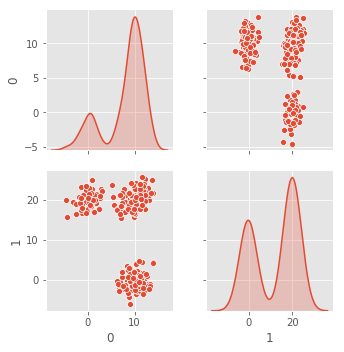

In [16]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.pairplot(df_hi,diag_kind='kde')

### 11. Find out the linkage matrix

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.linkage.html

Use ward as linkage metric and distance as Eucledian

In [17]:
from sklearn.cluster import AgglomerativeClustering 
model2 = AgglomerativeClustering(n_clusters=4, affinity='euclidean',  linkage='ward')
model2.fit(df_hi)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=4,
            pooling_func='deprecated')

In [18]:
L=pd.DataFrame(model2.labels_)
L[0].value_counts()

0    100
1     66
2     49
3     35
Name: 0, dtype: int64

In [19]:
AGC_labels = pd.DataFrame(model2.labels_ , columns = list(['labels']))
AGC_labels['labels'] = AGC_labels['labels'].astype('category')

### 12. Plot the dendrogram for the consolidated dataframe

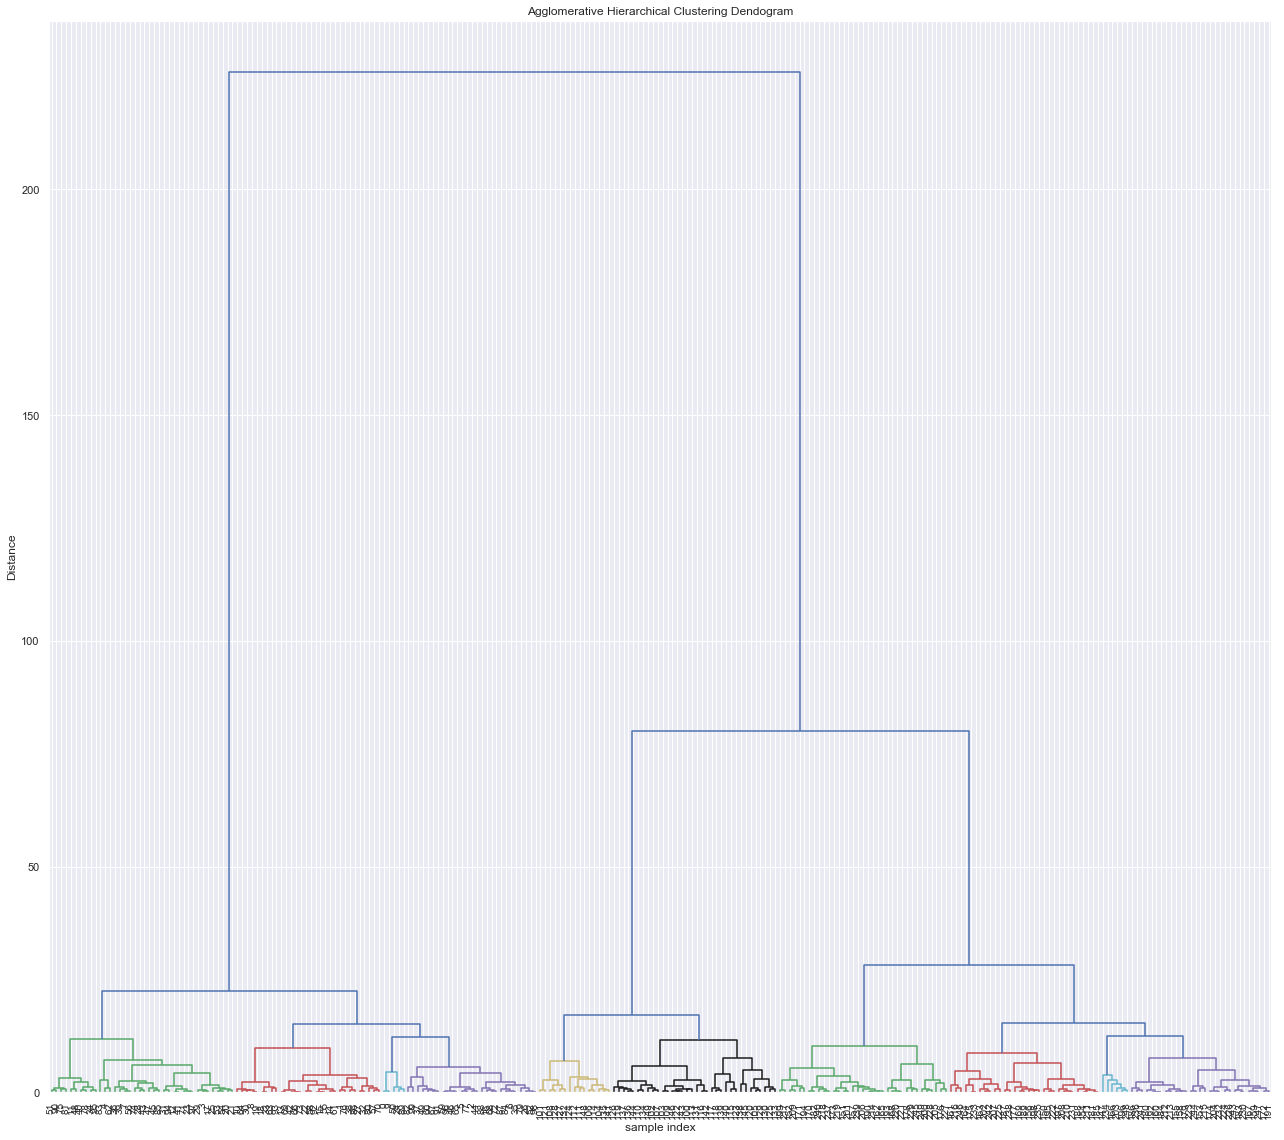

In [29]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(df_hi, 'ward')
dendrogram(Z,leaf_rotation=90.0,p=23,color_threshold=12,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

### 13. Recreate the dendrogram for last 12 merged clusters 

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

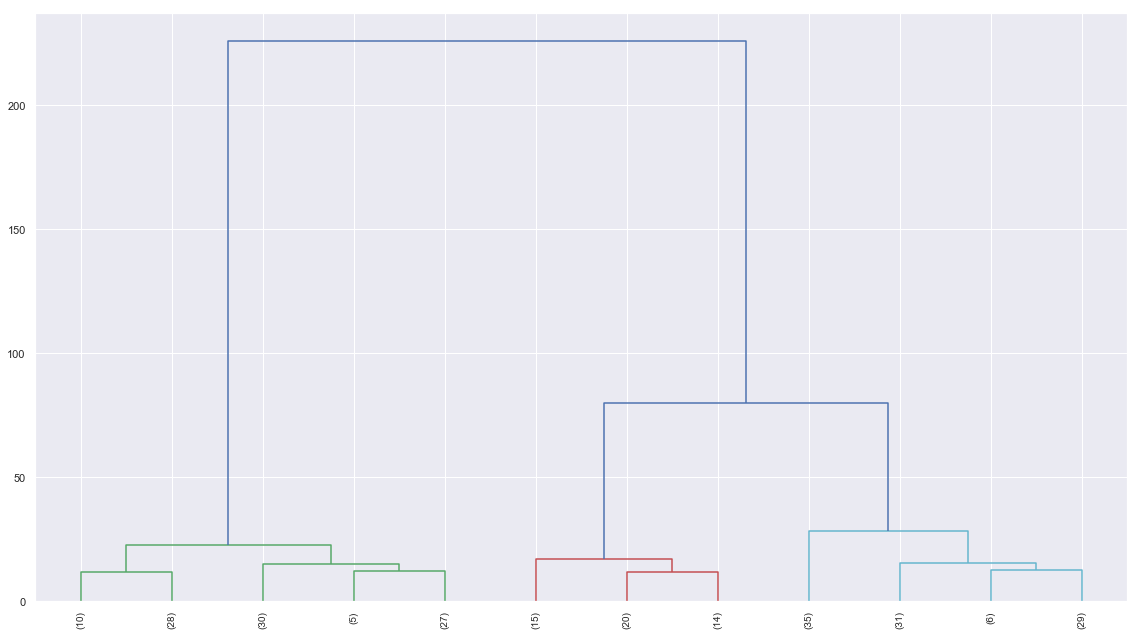

In [26]:
dendrogram(Z,leaf_rotation=90.0,p=12,color_threshold=52,leaf_font_size=10,truncate_mode='lastp')
plt.tight_layout()

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.cluster.hierarchy.fcluster.html

In [22]:
# The Dendogram distance to cut into 3 cluster is below 50. I have chosen dendogram distance = 50

### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

In [27]:
from scipy.cluster.hierarchy import fcluster
clust=fcluster(Z, t=50, criterion='distance')

### Use matplotlib to visually observe the clusters in 2D space 

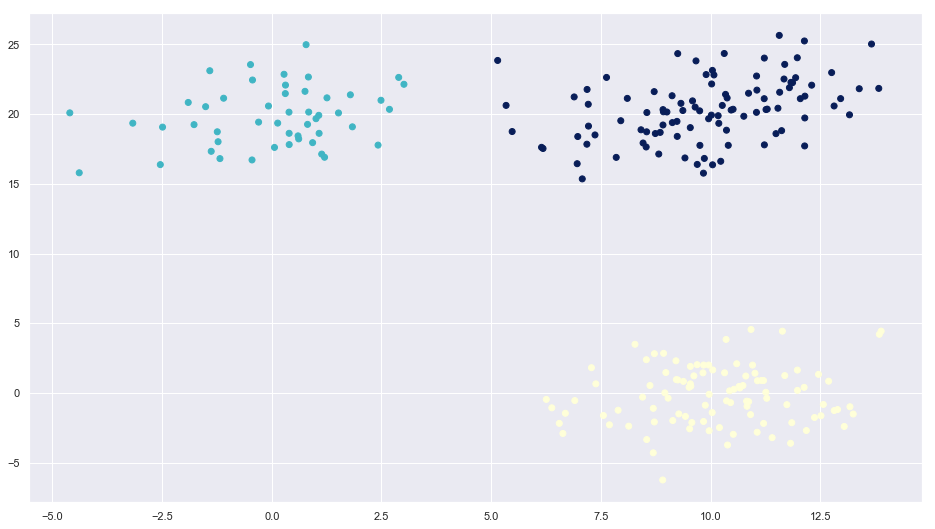

In [34]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
plt.scatter(df_hi[0],df_hi[1],c=clust, cmap='YlGnBu')